# 월마트 날씨별 판매량 예측

> ### 지점-아이템-날짜 기준으로 판매량(unit) 예측!

> - 일단 test.csv파일에 나와있는 항목들만 예측하도록 한다.

> - 학습은 train.csv파일에 있는 항목으로 진행한다.

> - output 형식은 sampleSubmission.csv파일의 내용을 참고한다
    - id, units = "2_1_2013-04-01" , int


In [14]:
#주피터노트북 그래프설정

%matplotlib inline
#주피터노트북에서 라인 아래에 보여지도록 설정

%config InlineBackend.figure_formats = {'png','retina'} 
#png 이미지 압축기술설정, retina 그래프 해상도 2배 높히기

#그래프 한글폰트 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

#그래프 한글폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgunbd.ttf").get_name()
rc('font', family=font_name)
#음수처리
mpl.rcParams['axes.unicode_minus'] = False

In [23]:
import os
import numpy as np
import pandas as pd

In [79]:
#전체기후날씨데이터(weather.csv) 불러오기
weather = pd.read_csv('weather.csv')

#지점-기후관측소 대조표(key.csv) 불러오기
map_key = pd.read_csv('key.csv')

#일일-지점-상품-판매량 정보(train.csv) 불러오기
sales_rate = pd.read_csv('train.csv')

#판매량 예측을 위한 지점정보(test.csv) 불러오기
test = pd.read_csv('test.csv')

In [126]:
#데이터확인칸

In [119]:
#지점별 heat테이블 만들기 + mean heat 행 만들기-----------------------------------
station_wth = pd.DataFrame(weather,columns=["station_nbr","date","heat"])

    #필터함수 정의
def Mto0(s):
    if(type(d)!='int'):
        return 0
    return s

    # 데이터타입 숫자화(이거 안되면 에러나니까 꼭 타입정제부터 하자)
station_wth = station_wth.replace(["M",None],0)
station_wth = station_wth.apply(pd.to_numeric, errors = 'ignore')

    # 스테이션별 피봇팅(테이블)
station_heat = station_wth.pivot("date","station_nbr","heat")
station_heat = station_heat.apply(pd.to_numeric, errors = 'ignore')

    # 평균구해넣기
avg_heat = station_wth.pivot_table("heat",["date"], aggfunc=np.mean)
avg_heat = avg_heat.apply(pd.to_numeric, errors = 'ignore')


#=============================================================================

#지점별 avgspeed테이블 만들기 + mean speed 행 만들기--------------------------------
# station_wth = pd.DataFrame(weather,columns=["station_nbr","date","avgspeed"])


# station_speed = station_wth.pivot("date","station_nbr","avgspeed")
# station_speed = station_speed.replace(["M",None],0)

# station_speed = station_speed.astype(int, errors='ignore')


# station_heat

In [134]:
station_wth

,station_nbr,date,heat,Mean
0,1,2012-01-01,23,
1,2,2012-01-01,24,
2,3,2012-01-01,20,
3,4,2012-01-01,10,
4,6,2012-01-01,16,
5,7,2012-01-01,23,
6,8,2012-01-01,0,
7,9,2012-01-01,38,
8,10,2012-01-01,2,
9,11,2012-01-01,5,


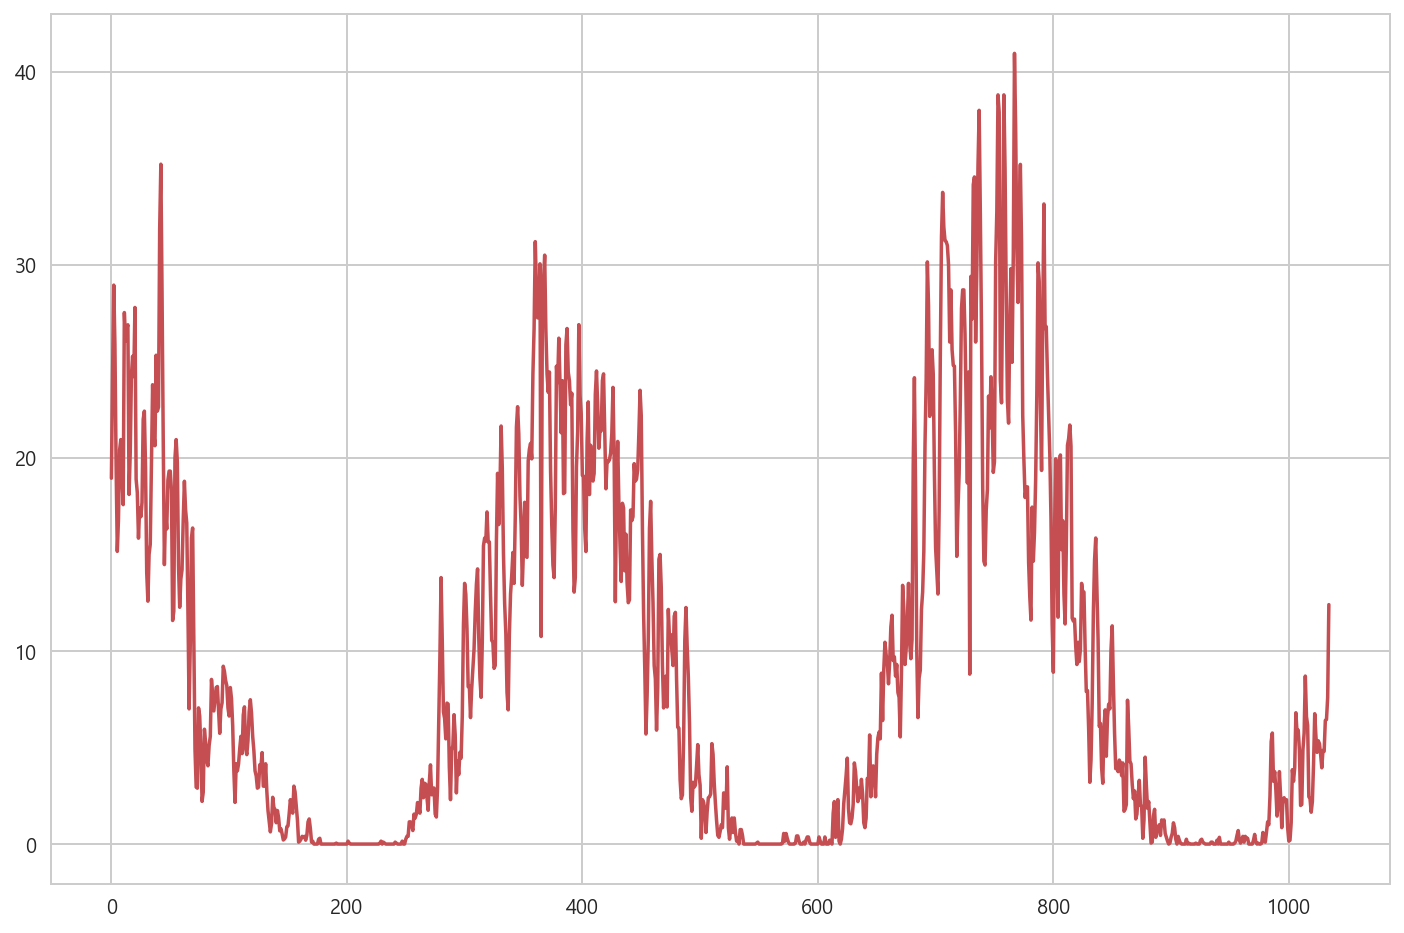

In [135]:
# 지역별 Heat/전체평균 비교 시각화

plt.figure(figsize=(12,8))

#개별데이터
y1 = station_heat[1]
y2 = station_heat[18]
y3 = station_heat[20]

#전체평균온도
Ya = avg_heat["heat"]

plt.plot(range(len(Ya)),Ya, "r")
# plt.yticks([0,10,20,30,40,50,60])
# plt.scatter([range(len(y1)),range(len(y2)),range(len(y3))],[y1,y2,y3],c=["b","g","r"])

plt.show()

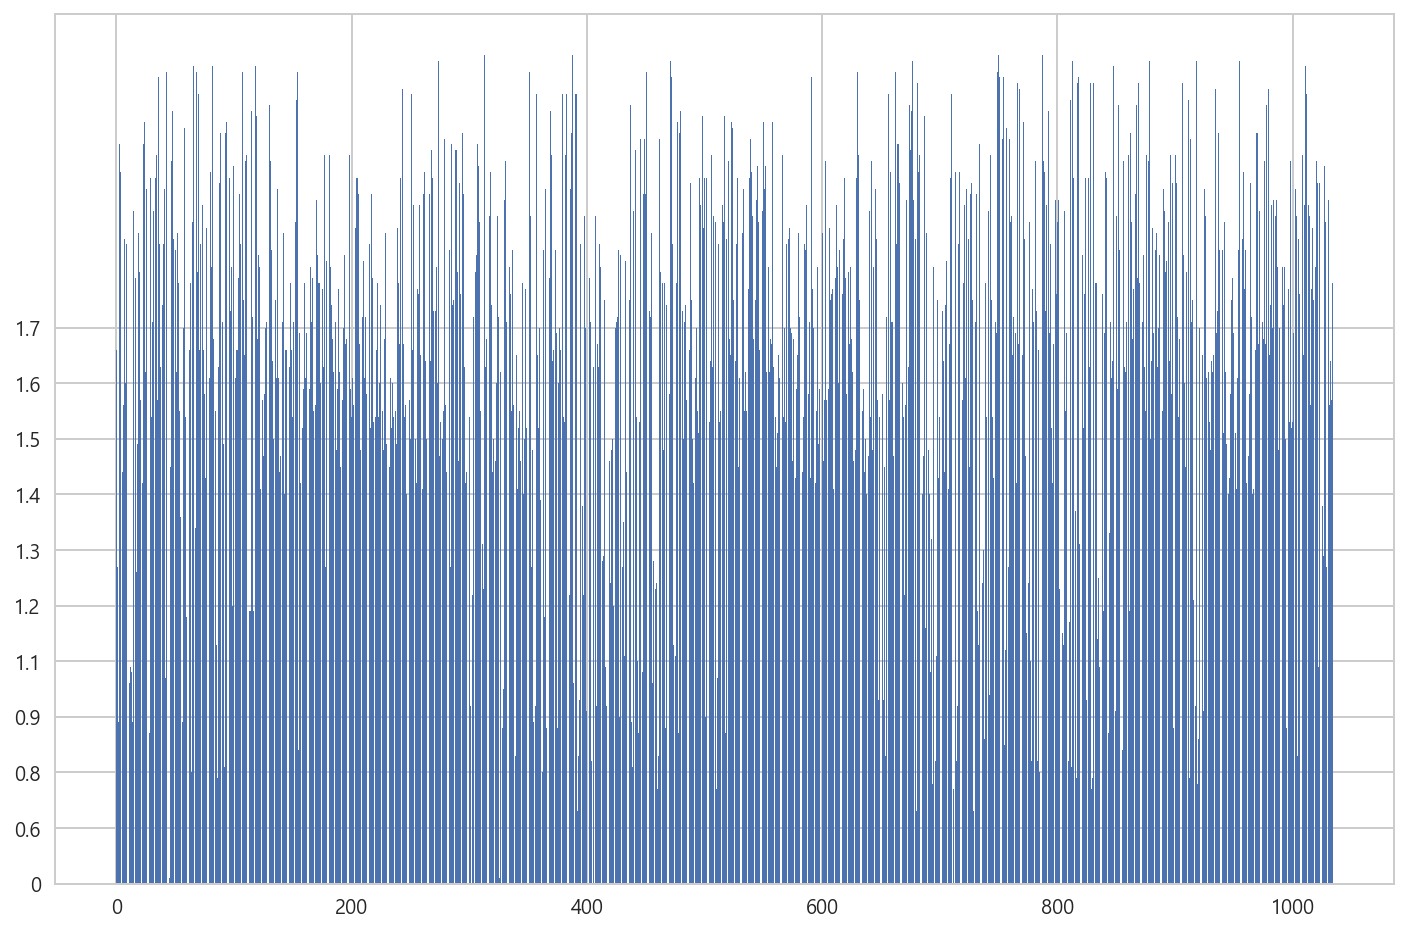

In [44]:
plt.figure(figsize=(12,8))
y1 = station_speed[1]
y2 = station_speed[18]
y3 = station_speed[20]
plt.bar(range(len(y1)),y1)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
# plt.scatter([range(len(y1)),range(len(y2)),range(len(y3))],[y1,y2,y3],c=["b","g","r"])

plt.show()